# Direct Methods for the solution of Linear Systems
1. Given a matrix $ A \in \mathbb{R}^{n \times n} $, the vector $ x_{\text{true}} = (1,1,\dots,1)^T \in \mathbb{R}^n $, and a value for $ n $, write a script that:
   - Computes the right-hand side of the linear system $ y = A x_{\text{true}} $ (test problem).
   - Computes the condition number in 2-norm of the matrix $ A $. Is it ill-conditioned? What if we use the $ \infty $-norm instead of the 2-norm?
   - Solves the linear system $ A x = y $ with the function `np.linalg.solve()`.
   - Computes the relative error between the computed solution and the true solution $ x_{\text{true}} $.
   - Plot a graph (using `matplotlib.pyplot`) with the relative errors as a function of $ n $ and (in a different window) the condition number in 2-norm and in $ \infty $-norm, as a function of $ n $.

2. Test the program above with the following choices of $ A \in \mathbb{R}^{n \times n} $:
   - A random matrix (created with the function `np.random.rand()`) with size varying in $ n = \{10, 20, 30, \dots, 100\} $.
   - The Vandermonde matrix (`np.vander`) with dimension $ n = \{5, 10, 15, 20, 25, 30\} $ with respect to the vector $ v = 1, 2, 3, \dots, n $.
   - The Hilbert matrix (`scipy.linalg.hilbert`) with dimension $ n = \{4, 5, 6, \dots, 12\} $.

2. Test the program above with the following choices of $ A \in \mathbb{R}^{n \times n} $:
   - A random matrix (created with the function `np.random.rand()`) with size varying in $ n = \{10, 20, 30, \dots, 100\} $.
   - The Vandermonde matrix (`np.vander`) with dimension $ n = \{5, 10, 15, 20, 25, 30\} $ with respect to the vector $ v = 1, 2, 3, \dots, n $.
   - The Hilbert matrix (`scipy.linalg.hilbert`) with dimension $ n = \{4, 5, 6, \dots, 12\} $.

In [15]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

## Definition of matrices and true solutions 

In [16]:
def generate_random_matrix(n):
    return np.random.randn(n,n), np.ones((n,))

In [17]:
def generate_hilbert_matrix(n):
    return scipy.linalg.hilbert(n), np.ones((n,))

In [18]:
def generate_vandermonde_matrix(n):
    return np.vander(np.arange(1,n+1),increasing=True), np.ones((n,))


### Relative Error
The relative error between the true solution $x_{true}$ and the computed solution $x_{sol}$ is defined as:
$$E(x_{true},x_{sol})=\dfrac{||x_{true}-x_{sol}||_2}{||x_{true}||_2}$$


In [19]:
def relative_error(x_true, x_sol):
    return np.linalg.norm(x_true-x_sol, 2)/np.linalg.norm(x_true, 2)

## Function

In [20]:
def compute_analysis(matrix_generator, size, matrix_type):
    # In order to plot, i need three data structures, 
    # one for the 2-norm, one for the infty-norm and
    # one for the relative errors
    rel_errors = np.zeros(len(size))
    cond_num_2 = np.zeros(len(size))
    cond_num_inf = np.zeros(len(size))

    
    for i, n in enumerate(size):
        # Computes the right-hand side of the linear system y = A x_true  (test problem).
        
        # create the matrix based on the parameter
        # each time, change the dimension n 
        A, x_true = matrix_generator(n)
        
        # computing the right-hand side of the linear system
        y = A@x_true
        
        # ------------------------------
        # Computes the condition number k_p in 2-norm of the matrix A. Is it ill-conditioned? 
        # What if we use the infty-norm instead of the 2-norm?
        p = 2
        p_inf = np.inf
        cond_num_2[i] = np.linalg.cond(A, p)
        cond_num_inf[i] = np.linalg.cond(A, p_inf)
        
        # -----------------------------
        # Solves the linear system A x = y with the function np.linalg.solve().
        x_sol = np.linalg.solve(A, y)
        
        # -----------------------------
        # Computes the relative error between the computed solution and the true solution x_true.
        rel_errors[i] = relative_error(x_true, x_sol)
        
        # print only two results for each matrix in order to show some outputs
        if(matrix_type == 'Random' and (n == 10 or n == 100)):
            print(f"Print for {matrix_type} matrix:\n")
            print(f"Value of n = {n}")
            print(f"The computed solution is {x_sol}, while true solution is {x_true}")
            print(f"The relative error is {rel_errors}\n")
        elif (matrix_type == 'Vandermonde' and (n == 5 or n == 30)):
            print(f"Print for {matrix_type} matrix:\n")
            print(f"Value of n = {n}")
            print(f"The computed solution is {x_sol}, while true solution is {x_true}")
            print(f"The relative error is {rel_errors}\n")
        elif (matrix_type == 'Hilbert' and (n == 4 or n == 15)):
            print(f"Print for {matrix_type} matrix:\n")
            print(f"Value of n = {n}")
            print(f"The computed solution is {x_sol}, while true solution is {x_true}")
            print(f"The relative error is {rel_errors}\n")
    
    # -------------------------
    # Plot a graph (using matplotlib.pyplot) with the relative errors as a function of n
    # and (in a different window) the condition number in 2-norm and in infty-norm, as a function of n.
    # PLOTTING the graph with the relative errors
    plt.figure(figsize=(14,7))
    plt.subplot(1,2,1)
    plt.semilogy(size, rel_errors, marker='o', label=f'Relative Errore - {matrix_type} Matrices')
    plt.title(f'Relative Error - {matrix_type} Matrices')
    plt.xlabel('n')
    plt.ylabel('Relative Error (log scale)')
    plt.grid(True)
    
    # PLOTTING the graph with the condition number in 2-norm and inf-norm
    plt.subplot(1,2,2)
    plt.semilogy(size, cond_num_2, marker='o', label='2-norm', color='blue')
    plt.semilogy(size, cond_num_inf, marker='x', label='∞-norm', color='red')
    plt.title(f'Condition Number - {matrix_type} Matrices')
    plt.xlabel('n')
    plt.ylabel('Condition Number (log scale)')
    plt.grid(True)
    plt.legend()
    
    plt.show()

### Consideration over ill-conditioned and well-conditioned matrixes
In order to define wheter a matrix is well-conditioned or ill-conditioned, we have to verify if the conditional number $k_2$ grows exponentially, such that $k_2(A)\approx c10^n$ or linearly, such that $k_2\approx cn$, where $n$ is the dimension of the matrix. For relative small conditional number, we can assume that the matrix is well-conditioned.

In general, the magnitude of the condition number does not depend on the p-norm. So, using the $\infty$-norm instead of the 2-norm does not influences on the result.


## Testing

Print for Random matrix:

Value of n = 10
The computed solution is [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], while true solution is [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
The relative error is [1.60924903e-15 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]

Print for Random matrix:

Value of n = 100
The computed solution is [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.], while true solution is [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

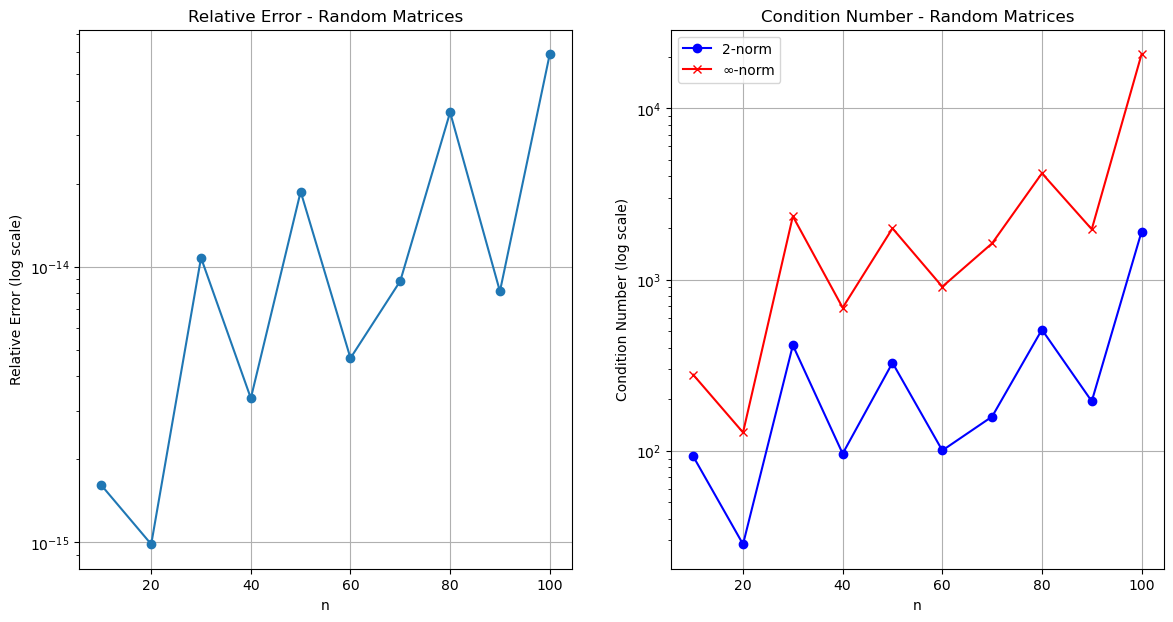

Print for Vandermonde matrix:

Value of n = 5
The computed solution is [1. 1. 1. 1. 1.], while true solution is [1. 1. 1. 1. 1.]
The relative error is [0. 0. 0. 0. 0. 0.]

Print for Vandermonde matrix:

Value of n = 30
The computed solution is [-1.32837558e+04  3.28817575e+04 -3.41365262e+04  2.02350750e+04
 -6.95893621e+03  1.44267548e+03 -1.88856268e+02  1.74875718e+01
  4.30886032e-02  1.03671822e+00  9.99106902e-01  1.00001246e+00
  9.99999924e-01  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00], while true solution is [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
The relative error is [0.00000000e+00 3.28040616e-06 8.00120127e+03 3.81056618e+05
 1.40885767e+05 9.80301465e+03]



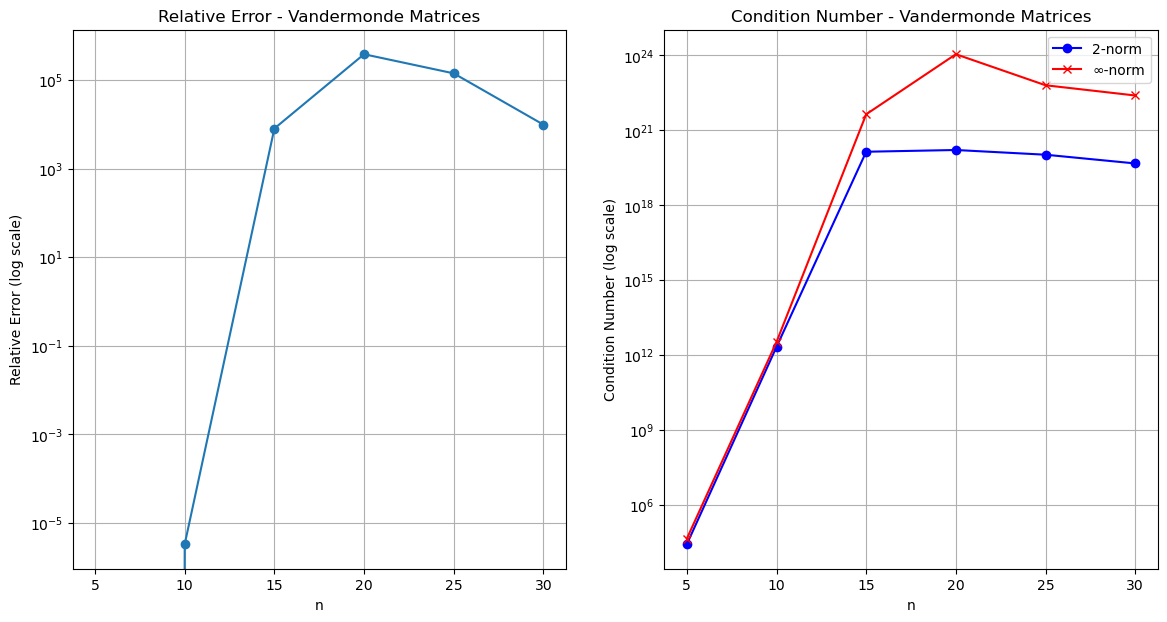

Print for Hilbert matrix:

Value of n = 4
The computed solution is [1. 1. 1. 1.], while true solution is [1. 1. 1. 1.]
The relative error is [9.74471816e-14 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]

Print for Hilbert matrix:

Value of n = 15
The computed solution is [ 0.99999995  1.00000807  0.99967264  1.00577502  0.94490775  1.31657382
 -0.15652389  3.72666552 -3.00357812  4.04053468  1.3253252  -2.17033528
  4.1161354  -0.39618677  1.25102602], while true solution is [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
The relative error is [9.74471816e-14 2.08133318e-13 1.47671205e-10 7.47641004e-10
 1.57581310e-07 6.36037108e-06 2.33442151e-04 3.81880311e-03
 1.50963868e-01 4.39921062e+00 1.05964403e+01 1.93267591e+00]



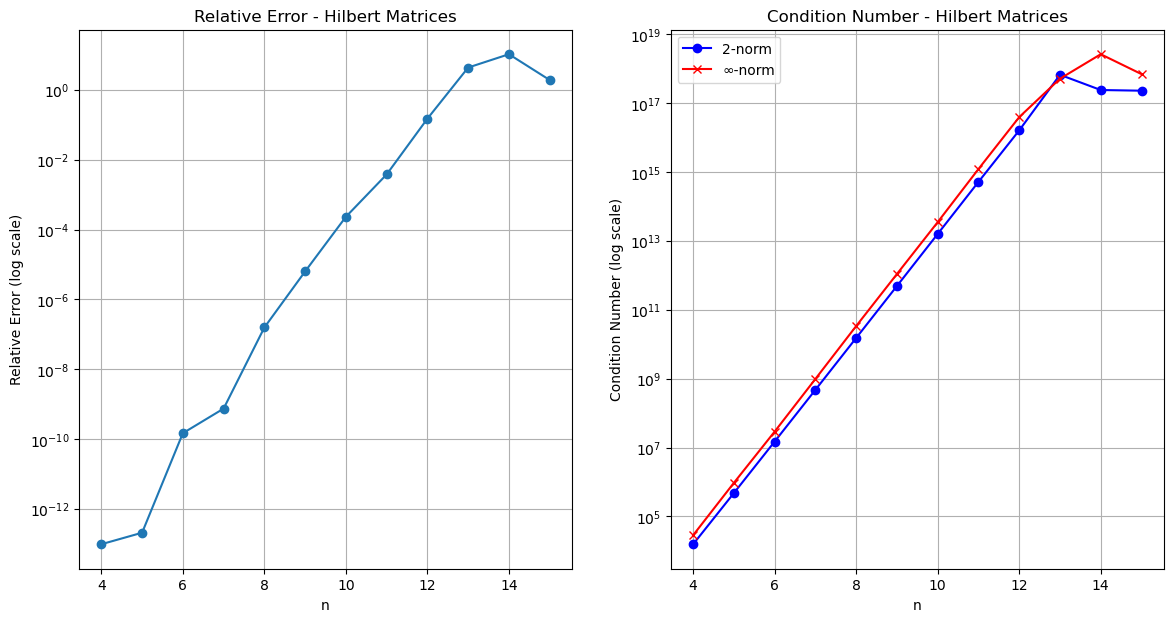

In [21]:
# Random Matrix
n_values_random = np.arange(10, 101, 10)
compute_analysis(generate_random_matrix, n_values_random, 'Random')

# Vandermonde Matrix
n_values_vandermonde = np.arange(5, 31, 5)
compute_analysis(generate_vandermonde_matrix, n_values_vandermonde, 'Vandermonde')

# Hilbert Matrix
n_values_hilbert = np.arange(4, 16)
compute_analysis(generate_hilbert_matrix, n_values_hilbert, 'Hilbert')

# Consideration
As we see from the graphs:
- Random matrix: Generally well-conditioned, with condition number varying based on random values but usually remaining manageable. We can observe this behaviour both from the plot, which shows limited condition number (for either $\infty$-norm or $2$-norm) and the print, which shows that, independent from the choice of $n$, the computed solution is identical to the true solution.
- Hilbert matrix: Always ill-conditioned, with the condition number increasing exponentially even for small $n$. We can see that from the last print, in which even with a small number as $n=15$ the computed solution is pretty different from the true one.
- Vandermonde matrix: Ill-conditioned as $n$ increases, with the condition number initially rising steeply and then leveling off in a log scale.